# Drop in Birth Rate Investigation

In the previous notebook, one of the plots showed that the population under age 4 declined in the 1990's and then came back to normal. This notebook searches for the reason why. The conclusion is that it is mostly caused by China, and it is likely that this is due to the one child policy.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv("../../M2/carpentry/completeDF.csv")
print(df.shape)
df.head()

(3150, 601)


,CountryName,Year,SPURBGROW,SPPOPAG25FEIN,SPPOPAG25MAIN,SPPOPDPND,SPPOPDPNDOL,SPPOPDPNDYG,SPPOPGROW,SPPOPTOTL,...,NYGDPFCSTKD,NYGDPFCSTKN,NYTAXNINDCD,SEPRMENRRFE,SEENRPRIMFMZS,SEPRMENRRMA,NVINDMANFKDZG,Continent,Region1,ISO3
0,Albania,1990.0,2.543043,29833.0,30896.0,61.994909,8.901594,53.093316,1.799086,3286542.0,...,4.687984e+09,5.561554e+11,4.565230e+08,99.688721,1.00459,99.233337,-1.330062,Europe,Southern Europe,ALB
1,Albania,1991.0,0.141061,28894.0,29109.0,62.715405,9.191396,53.524009,-0.602810,3266790.0,...,3.484063e+09,4.133292e+11,5.590416e+08,101.441803,1.00398,101.039749,4.437151,Europe,Southern Europe,ALB
2,Albania,1992.0,0.878430,27689.0,26863.0,63.311979,9.516996,53.794984,-0.606435,3247039.0,...,3.241802e+09,3.845887e+11,5.590416e+08,100.397087,1.01642,98.775101,4.437151,Europe,Southern Europe,ALB
3,Albania,1993.0,0.855535,26544.0,24681.0,63.743013,9.867033,53.875979,-0.610166,3227287.0,...,3.599532e+09,4.270277e+11,7.219805e+08,100.271362,1.03497,96.882889,5.424634,Europe,Southern Europe,ALB
4,Albania,1994.0,0.843726,25748.0,23079.0,64.077234,10.223010,53.854224,-0.613881,3207536.0,...,4.012270e+09,4.759926e+11,1.058321e+09,100.879402,0.98764,102.142090,8.645841,Europe,Southern Europe,ALB


### Plot population under 4

In [8]:
# Set index so plots know to plot year as x-axis
df.set_index('Year', inplace=True)

In [9]:
# To make plots of all countries
total_df = df.groupby('Year').sum()
total_df.head()

,SPURBGROW,SPPOPAG25FEIN,SPPOPAG25MAIN,SPPOPDPND,SPPOPDPNDOL,SPPOPDPNDYG,SPPOPGROW,SPPOPTOTL,SPPOPTOTLFEIN,SPPOPTOTLFEZS,...,ENATMCO2EGFZS,ENATMCO2ELFZS,NEGDITOTLKDZG,NYGDPFCSTKD,NYGDPFCSTKN,NYTAXNINDCD,SEPRMENRRFE,SEENRPRIMFMZS,SEPRMENRRMA,NVINDMANFKDZG
Year,,,,,,,,,,,,,,,,,,,,,
1990.0,279.759260,40592122.0,42173263.0,7510.701655,1162.766575,6347.935079,170.465163,4.701052e+09,2.333254e+09,5315.854357,...,1212.986236,6973.903179,850.561438,2.600590e+13,4.591541e+15,1.374151e+12,9601.805018,98.821908,10094.732652,308.817125
1991.0,262.811746,41466106.0,43015912.0,7474.498757,1179.778333,6294.720424,166.053351,4.778308e+09,2.371298e+09,5316.318008,...,1208.573246,7049.279521,613.419636,2.643561e+13,5.095324e+15,1.398382e+12,9772.157994,99.216002,10239.129527,206.094787
1992.0,256.164914,42367416.0,43869509.0,7427.467998,1195.792153,6231.675845,154.540022,4.853734e+09,2.408500e+09,5316.933813,...,1238.545845,6887.454756,471.325152,2.695567e+13,5.057999e+15,1.472371e+12,9717.630896,99.642064,10138.334447,239.044722
1993.0,249.621997,43120229.0,44593560.0,7369.070416,1210.508701,6158.561715,148.906973,4.927901e+09,2.445119e+09,5317.707570,...,1235.225706,6894.824800,186.306067,2.726890e+13,5.218638e+15,1.442955e+12,9822.156717,99.949630,10212.225763,149.280554
1994.0,242.575364,43608792.0,45097950.0,7299.316604,1223.356078,6075.960526,143.014525,5.001080e+09,2.481250e+09,5318.546506,...,1293.721996,6740.261289,791.401582,2.956642e+13,5.327921e+15,1.624368e+12,9791.690641,99.478730,10239.146259,343.744162


There is a dip between 1990-1998. What could have caused this?

Major world events in this time period include the fall of the Soviet Union, the rise of the internet, Nelson Mandela's election, the end of Reagan/Bush/Thatcher, most of Bill Clinton's presidency, the Persian Gulf War, the creation of the European Union, the breakup of Yugoslavia and ensuing war, NAFTA signed, the Rwandan genocide, the adoption of the Euro, and Britain returning Hong Kong to China.

Countries who were effected by these events include the US, all EU states, former soviet states, former yugoslav states, South Africa, Rwanda, China, Hong Kong, Canada, Mexico, most of the middle east (especially Iraq, Kuwait, and Saudi Arabia), and Japan. Grouping the countries by major events may give us a better idea of what caused this temporary drop in the number of children under 4.

### Plot population under 4 for each group

In [10]:
# Former Soviet States
soviet_countries = ['RUS', 'UKR', 'BLR', 'MDA', 'UZB', \
                    'KAZ', 'KGZ', 'TJK', 'TKM', 'GEO', \
                    'AZE', 'ARM', 'LTU', 'LVA', 'EST']
# Eastern Bloc/Warsaw Pact Countries (Countries under Soviet influence)
bloc_countries = ['RUS', 'UKR', 'BLR', 'MDA', 'UZB', \
                    'KAZ', 'KGZ', 'TJK', 'TKM', 'GEO', \
                    'AZE', 'ARM', 'LTU', 'LVA', 'EST', \
                 'ALB', 'BGR', 'CZE', 'SVK', 'HUN', 'ROU']
# Balkan States (former Yugoslavia)
yugo_countries = ['SVN', 'HRV', 'BIH', 'SRB', 'MNE', 'MKD']
# Middle East (Perian Gulf War Participants)
pgulf_countries = ['IRQ', 'KWT', 'SAU', 'EGY', 'AFG', \
                   'SYR', 'OMN', 'PAK', 'ARE', 'QAT']
# China, Japan, and surrounding countries
easia_countries = ['CHN', 'JPN', 'HKG', 'KOR', 'TWN']
# EU states of the 90s
eu_countries = ['BEL', 'FRA', 'DEU', 'ITA', 'LUX', 'NLD', \
                'DNK', 'IRL', 'GBR', 'GRC', 'ESP', 'PRT', \
               'AUT', 'FIN', 'SWE']
# US, Mexico, and Canada (NAFTA participants)
nafta_countries = ['USA', 'CAN', 'MEX']

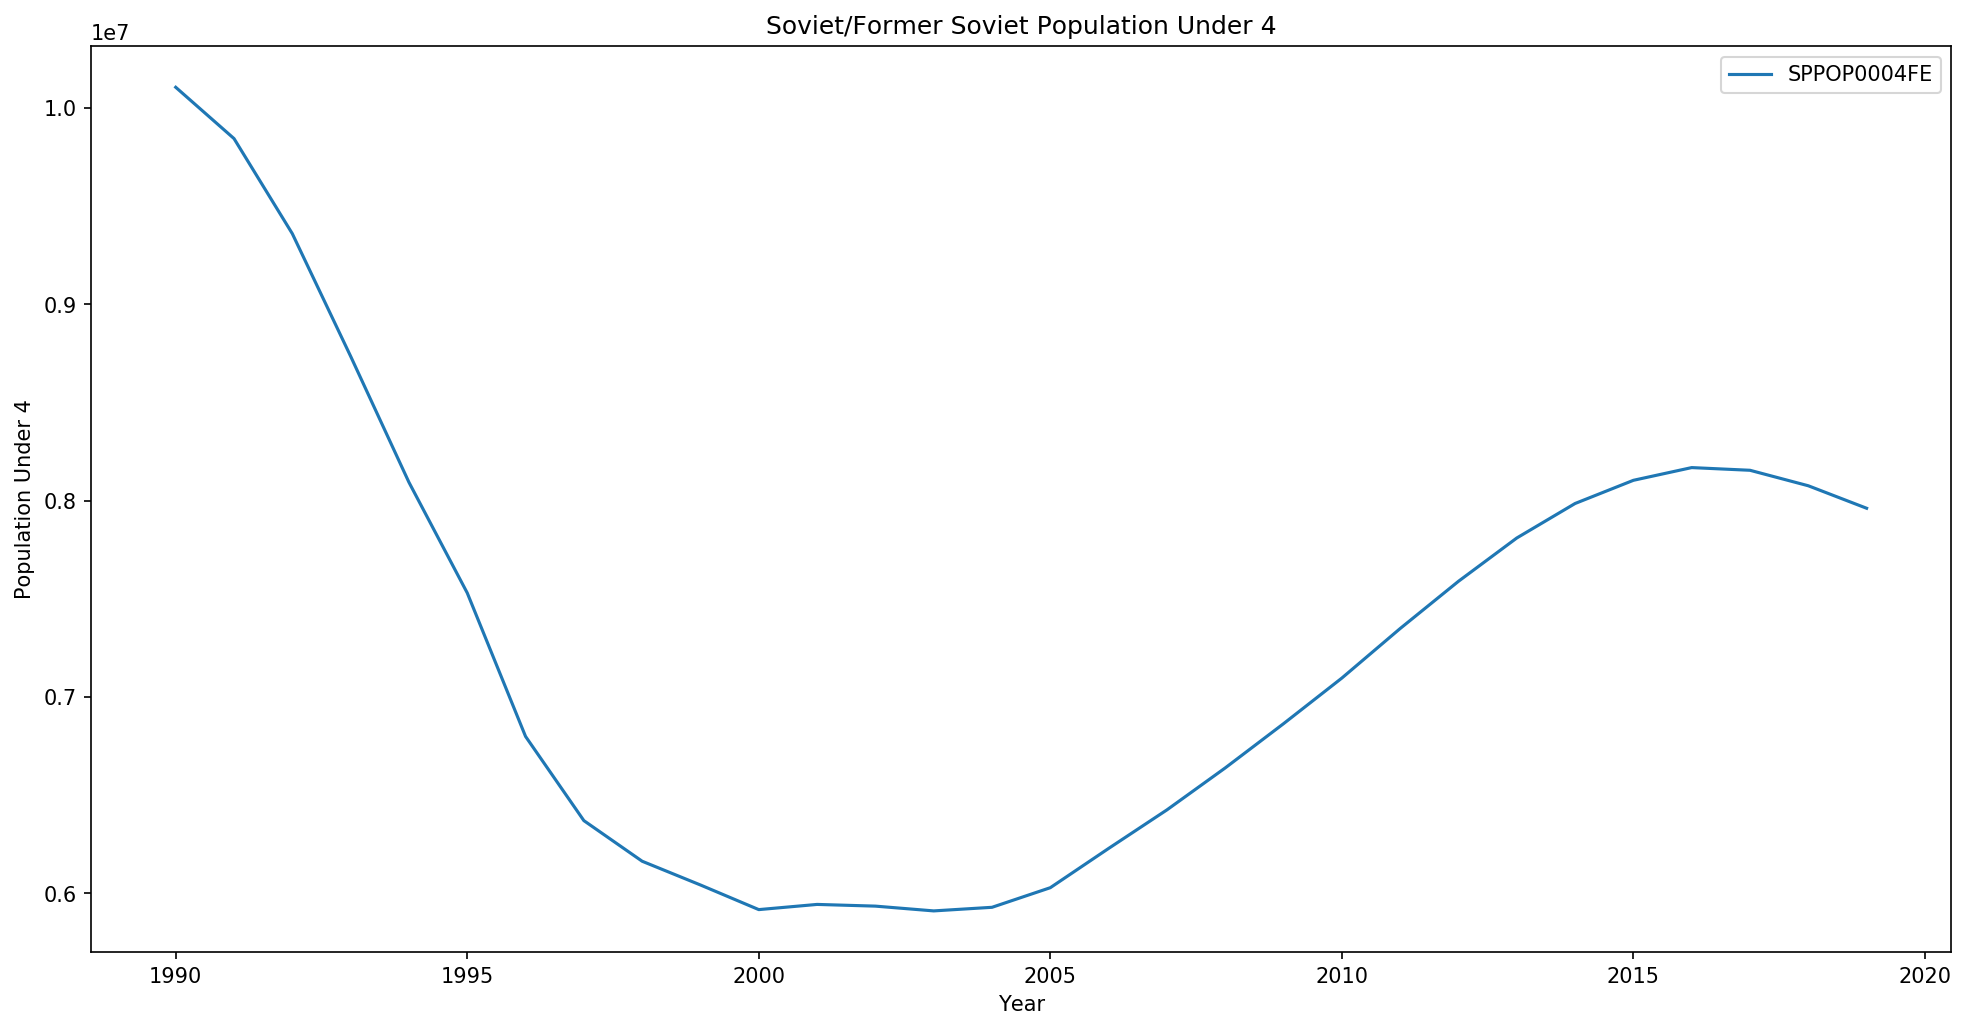

In [14]:
soviet_df = df[df["ISO3"].isin(soviet_countries)]
soviet_df = soviet_df.groupby('Year').sum()


plt.figure(figsize=(16, 8), dpi=150)
  
soviet_df['SPPOP0004FE'].plot()
#total_df['SPPOP0004FE'].plot()

plt.title('Soviet/Former Soviet Population Under 4')

plt.xlabel('Year')
plt.ylabel('Population Under 4')
plt.legend()

Text(0, 0.5, 'Population Under 4')

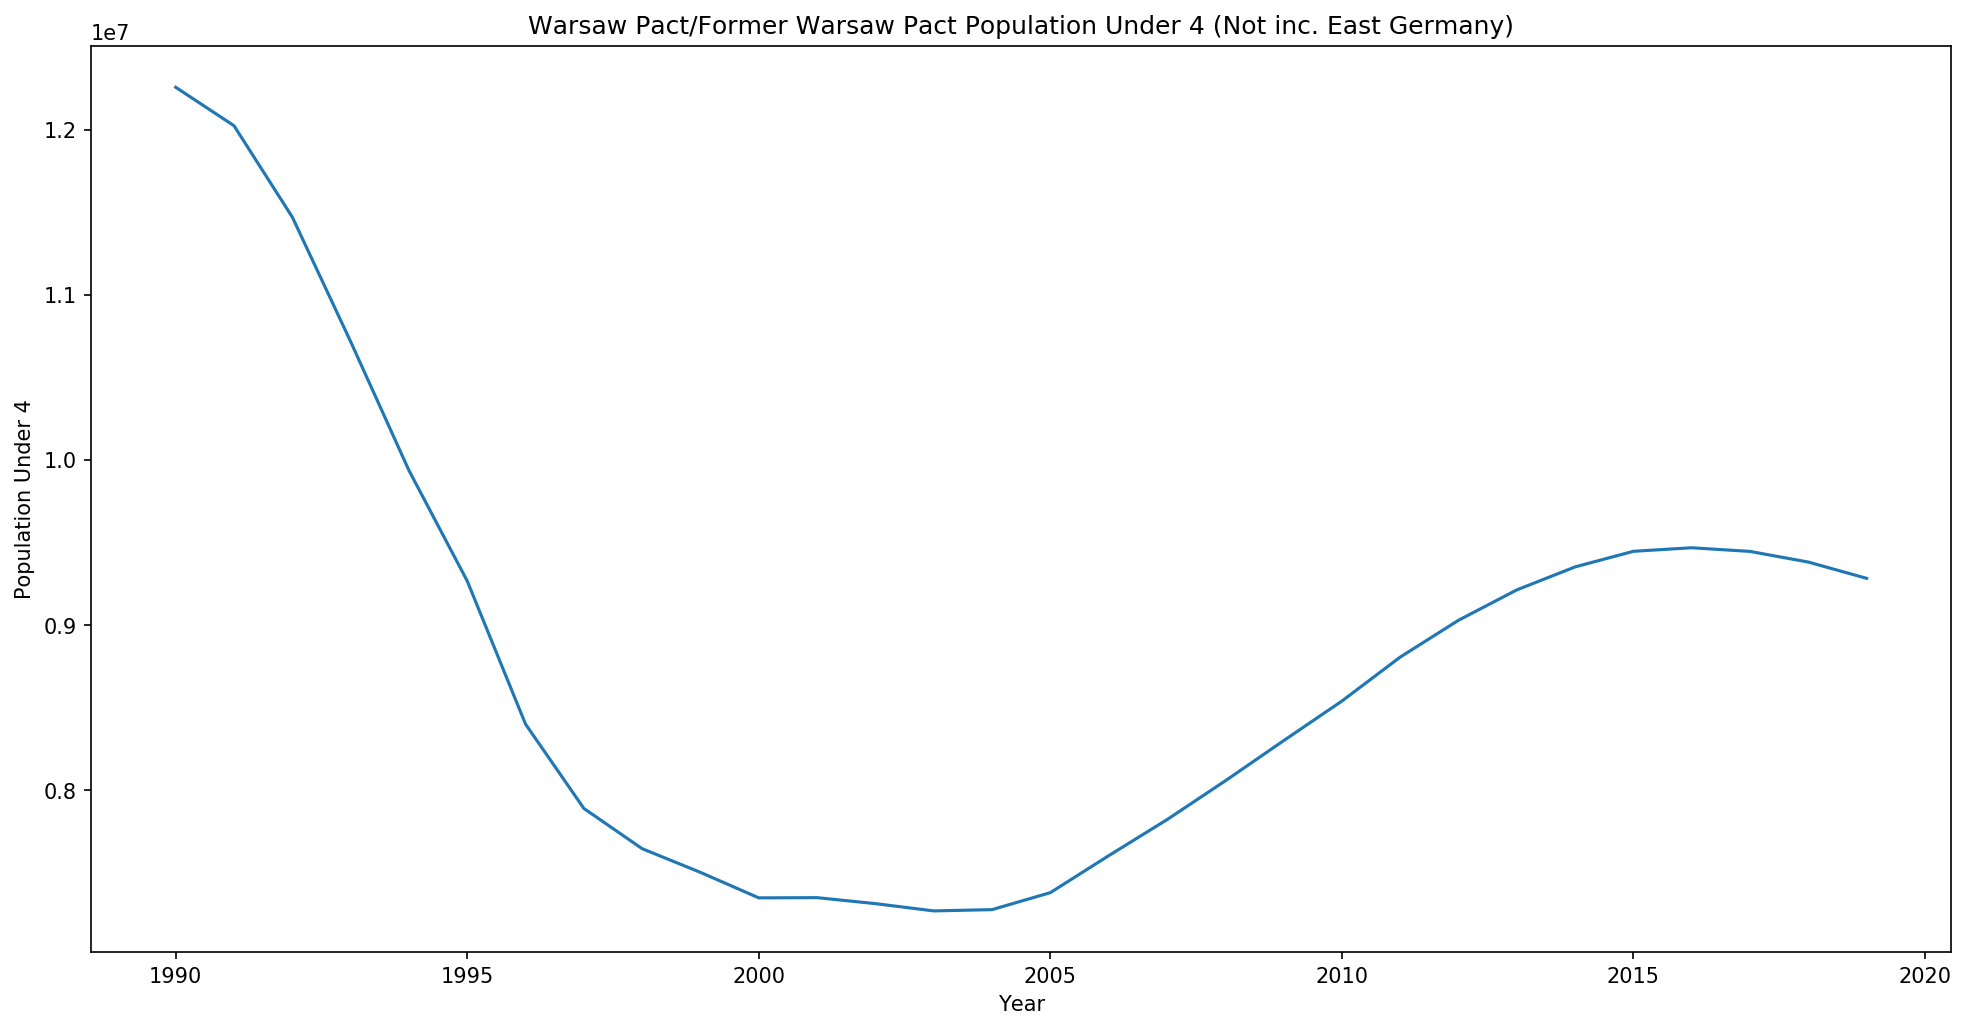

In [15]:
bloc_df = df[df["ISO3"].isin(bloc_countries)]
bloc_df = bloc_df.groupby('Year').sum()


plt.figure(figsize=(16, 8), dpi=150)
  
bloc_df['SPPOP0004FE'].plot()

plt.title('Warsaw Pact/Former Warsaw Pact Population Under 4 (Not inc. East Germany)')

plt.xlabel('Year')
plt.ylabel('Population Under 4')

This dip in population follows the worldwide dip closely, but only accounts for a small percentage of the dip.

Text(0, 0.5, 'Population Under 4')

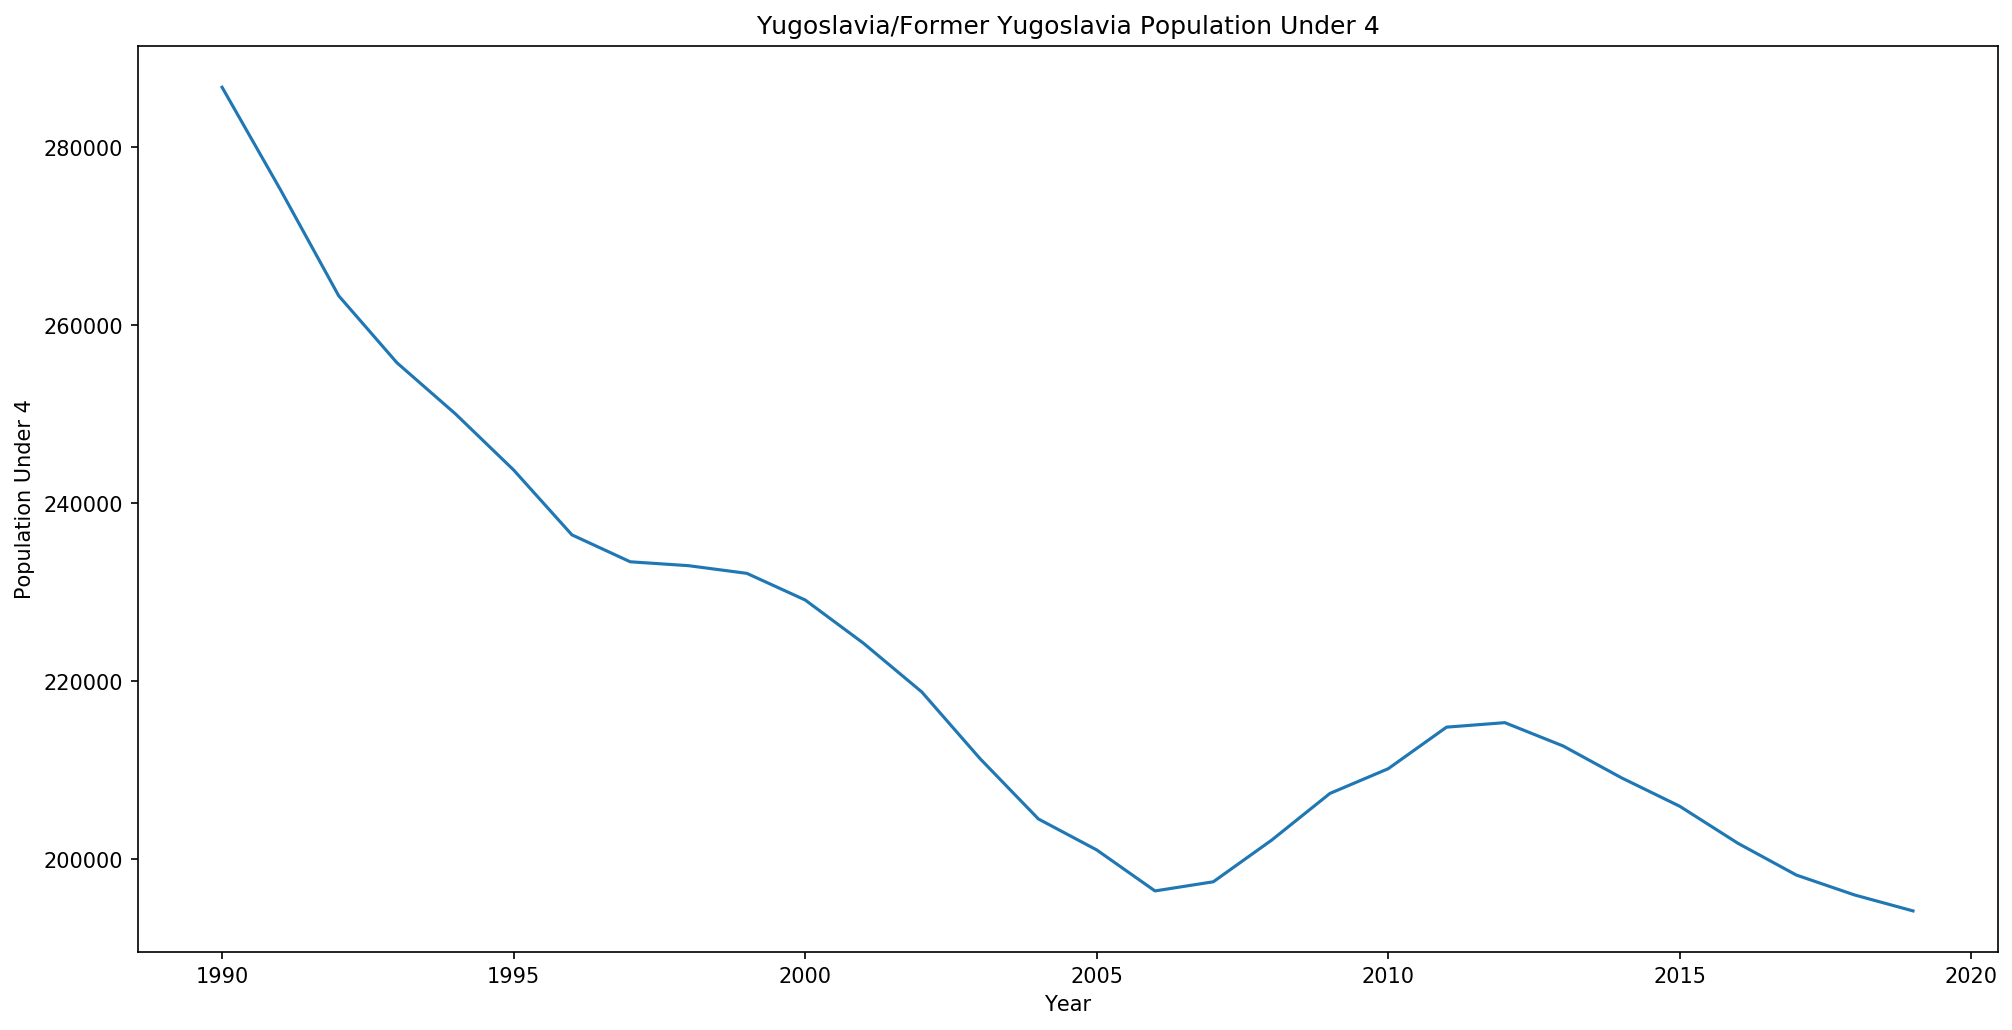

In [16]:
yugo_df = df[df["ISO3"].isin(yugo_countries)]
yugo_df = yugo_df.groupby('Year').sum()


plt.figure(figsize=(16, 8), dpi=150)
  
yugo_df['SPPOP0004FE'].plot()

plt.title('Yugoslavia/Former Yugoslavia Population Under 4')

plt.xlabel('Year')
plt.ylabel('Population Under 4')

Text(0, 0.5, 'Population Under 4')

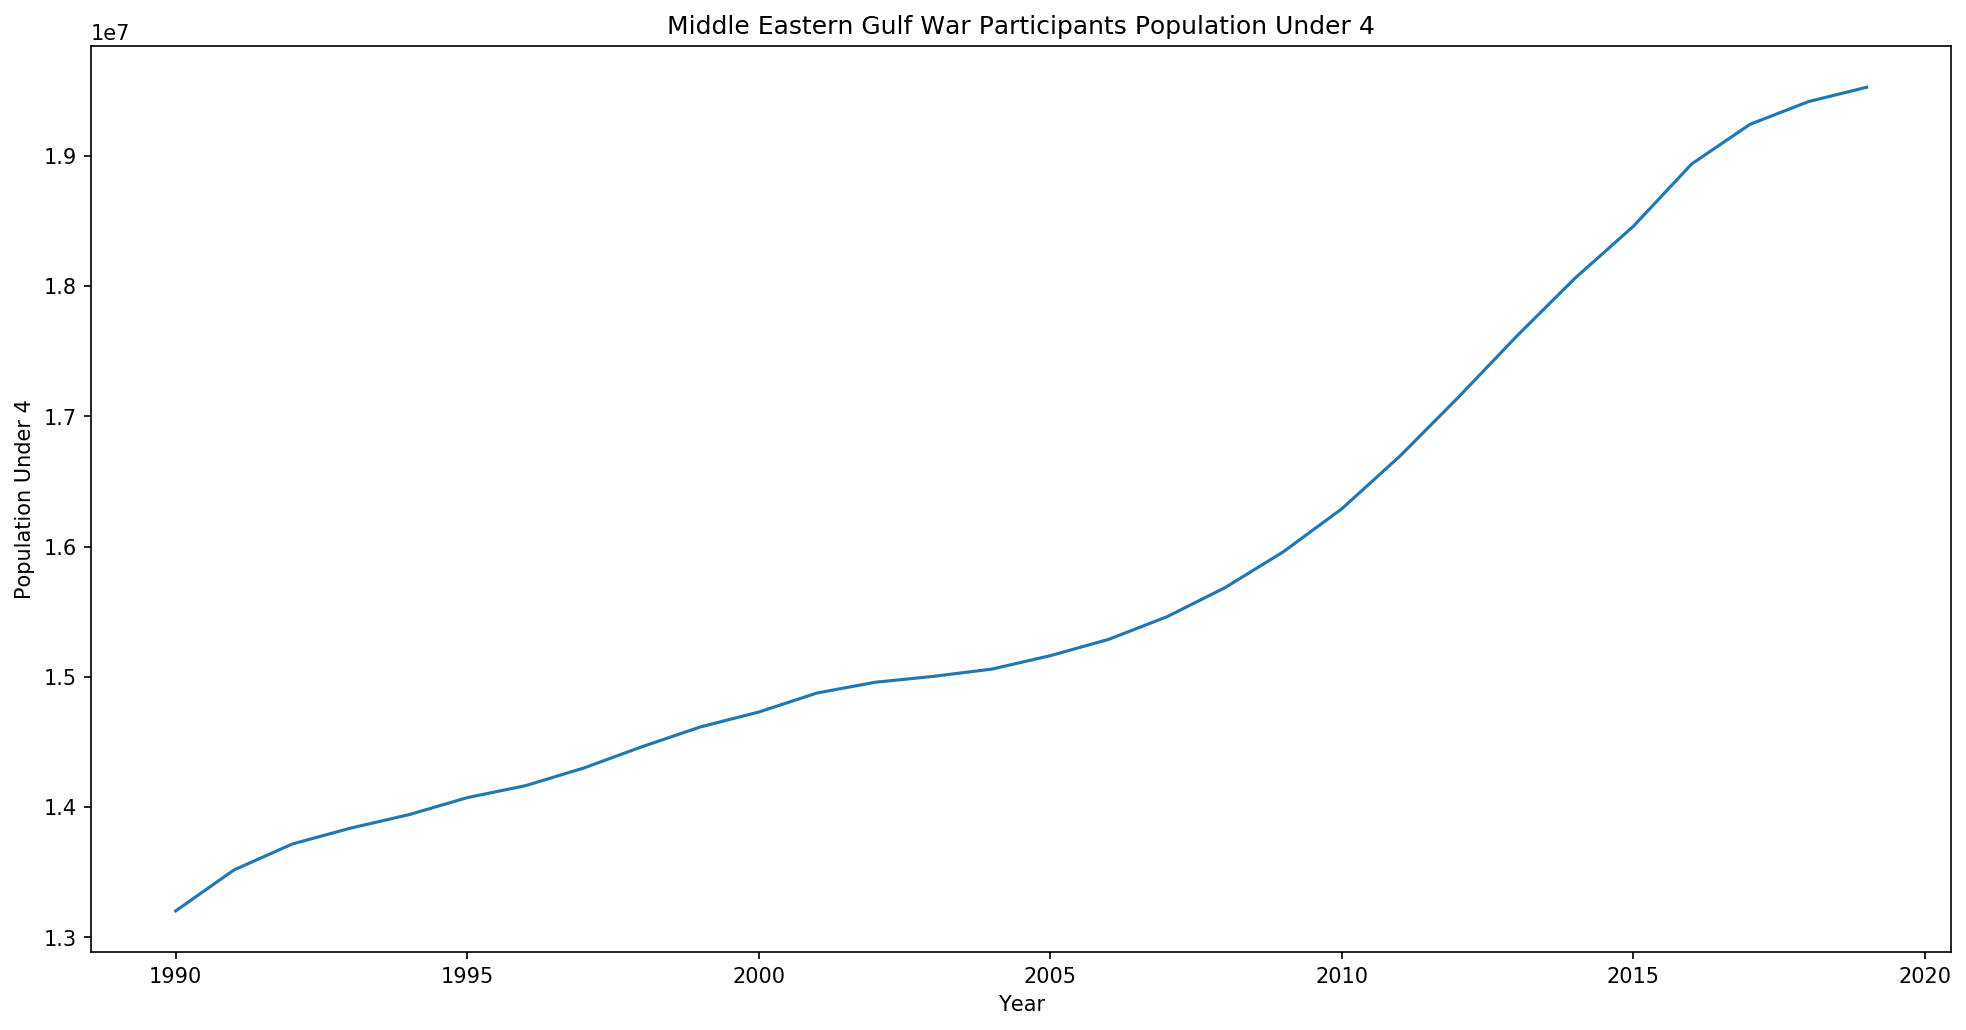

In [17]:
pgulf_df = df[df["ISO3"].isin(pgulf_countries)]
pgulf_df = pgulf_df.groupby('Year').sum()


plt.figure(figsize=(16, 8), dpi=150)
  
pgulf_df['SPPOP0004FE'].plot()

plt.title('Middle Eastern Gulf War Participants Population Under 4')

plt.xlabel('Year')
plt.ylabel('Population Under 4')

Text(0, 0.5, 'Population Under 4')

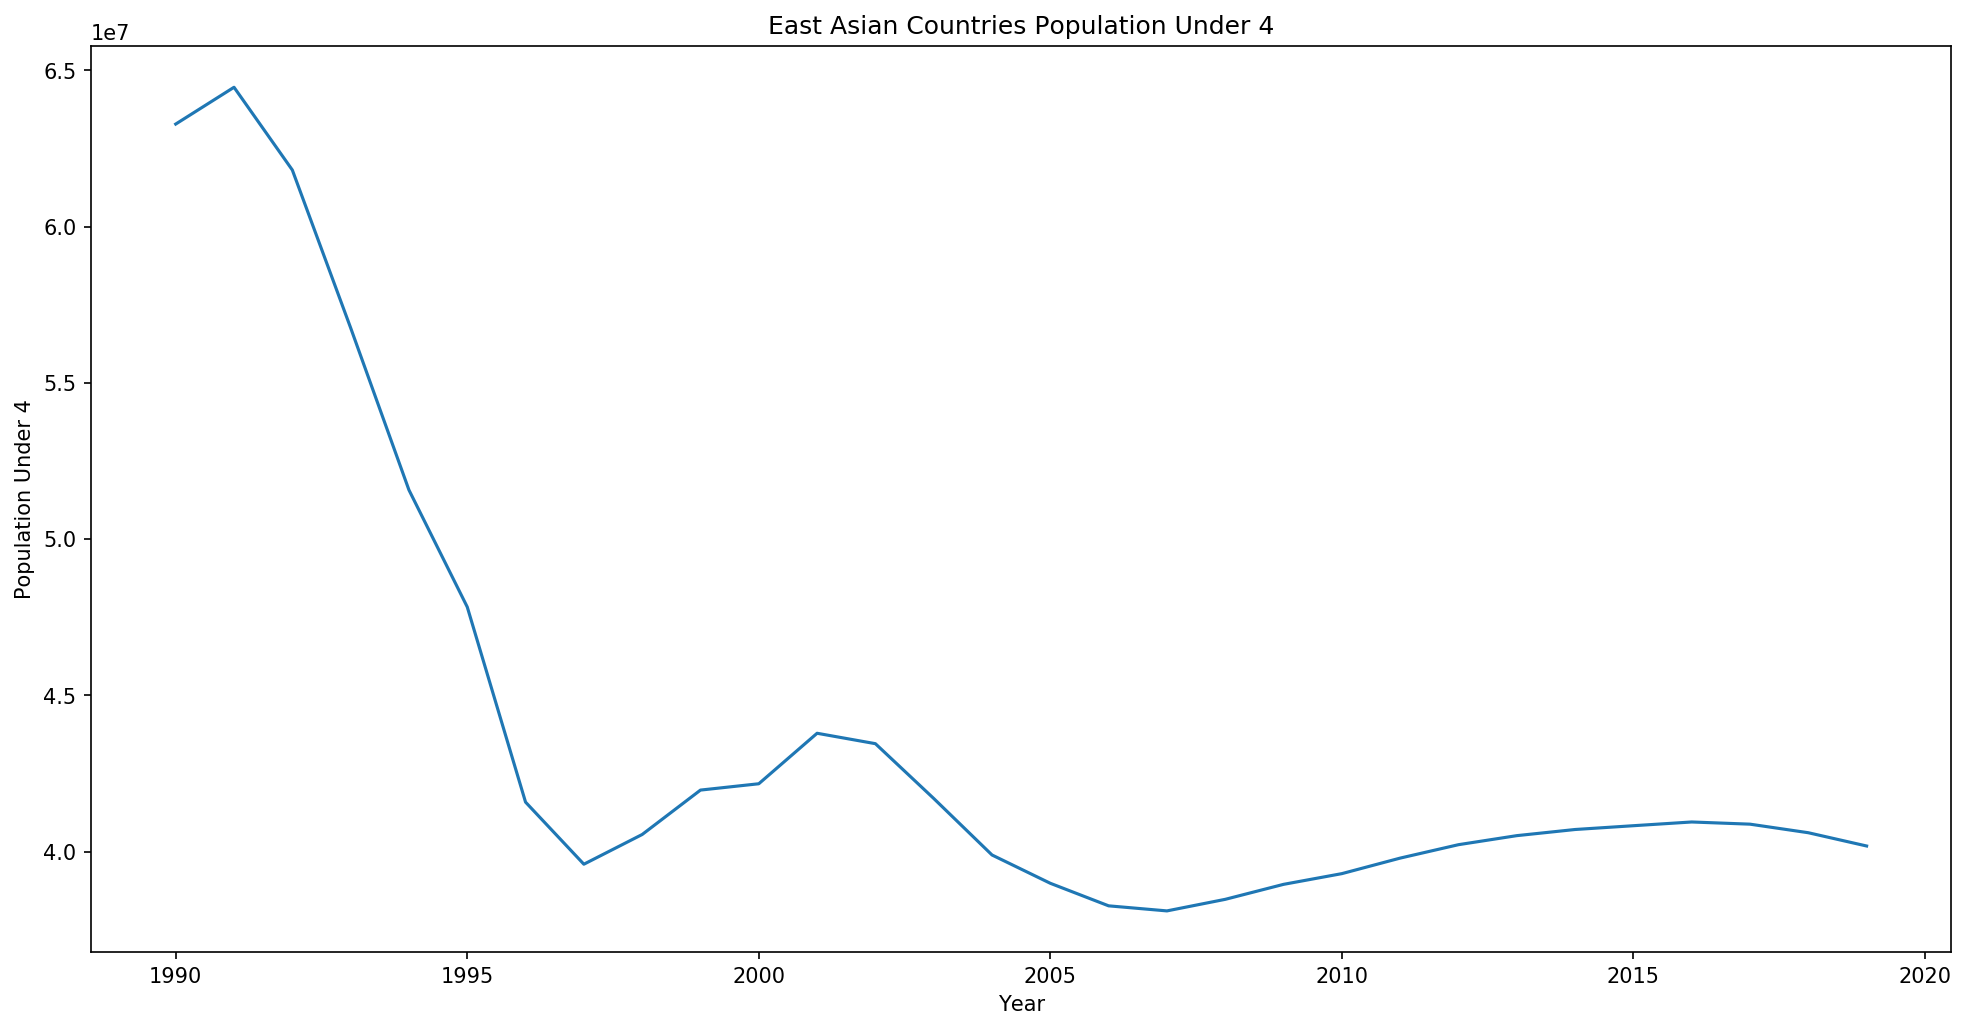

In [18]:
easia_df = df[df["ISO3"].isin(easia_countries)]
easia_df = easia_df.groupby('Year').sum()


plt.figure(figsize=(16, 8), dpi=150)
  
easia_df['SPPOP0004FE'].plot()

plt.title('East Asian Countries Population Under 4')

plt.xlabel('Year')
plt.ylabel('Population Under 4')

This is an odd trend. It doesn't match with overall population, but there is a large decline during the 90's. It does account for a large portion of the overall decline. Should check China individually.

Text(0, 0.5, 'Population Under 4')

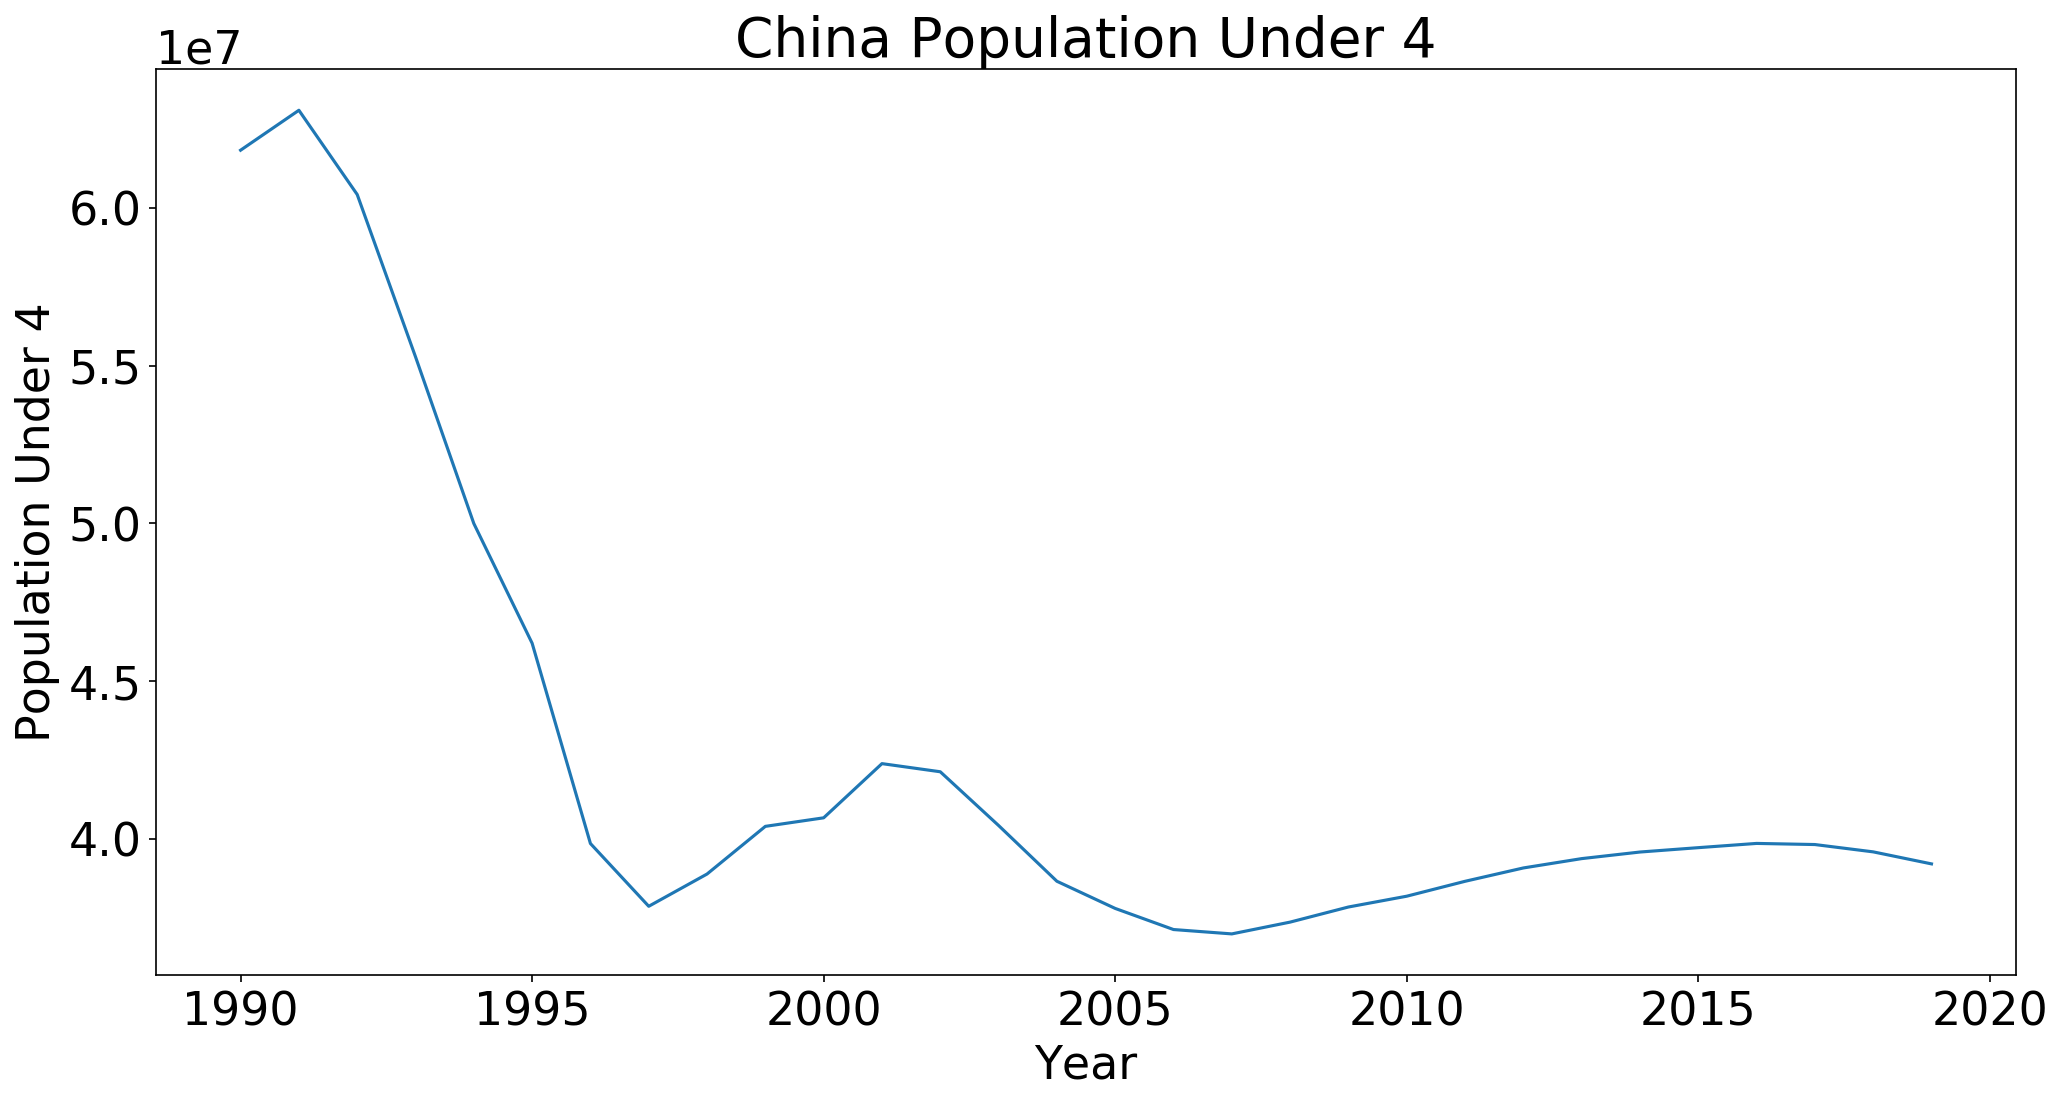

In [19]:
china_df = df[df["ISO3"] == "CHN"]
china_df = china_df.groupby('Year').sum()

plt.rcParams['font.size'] = 22
plt.figure(figsize=(16, 8), dpi=150)
  
china_df['SPPOP0004FE'].plot()

plt.title('China Population Under 4')

plt.xlabel('Year')
plt.ylabel('Population Under 4')

Text(0, 0.5, 'Population Under 4')

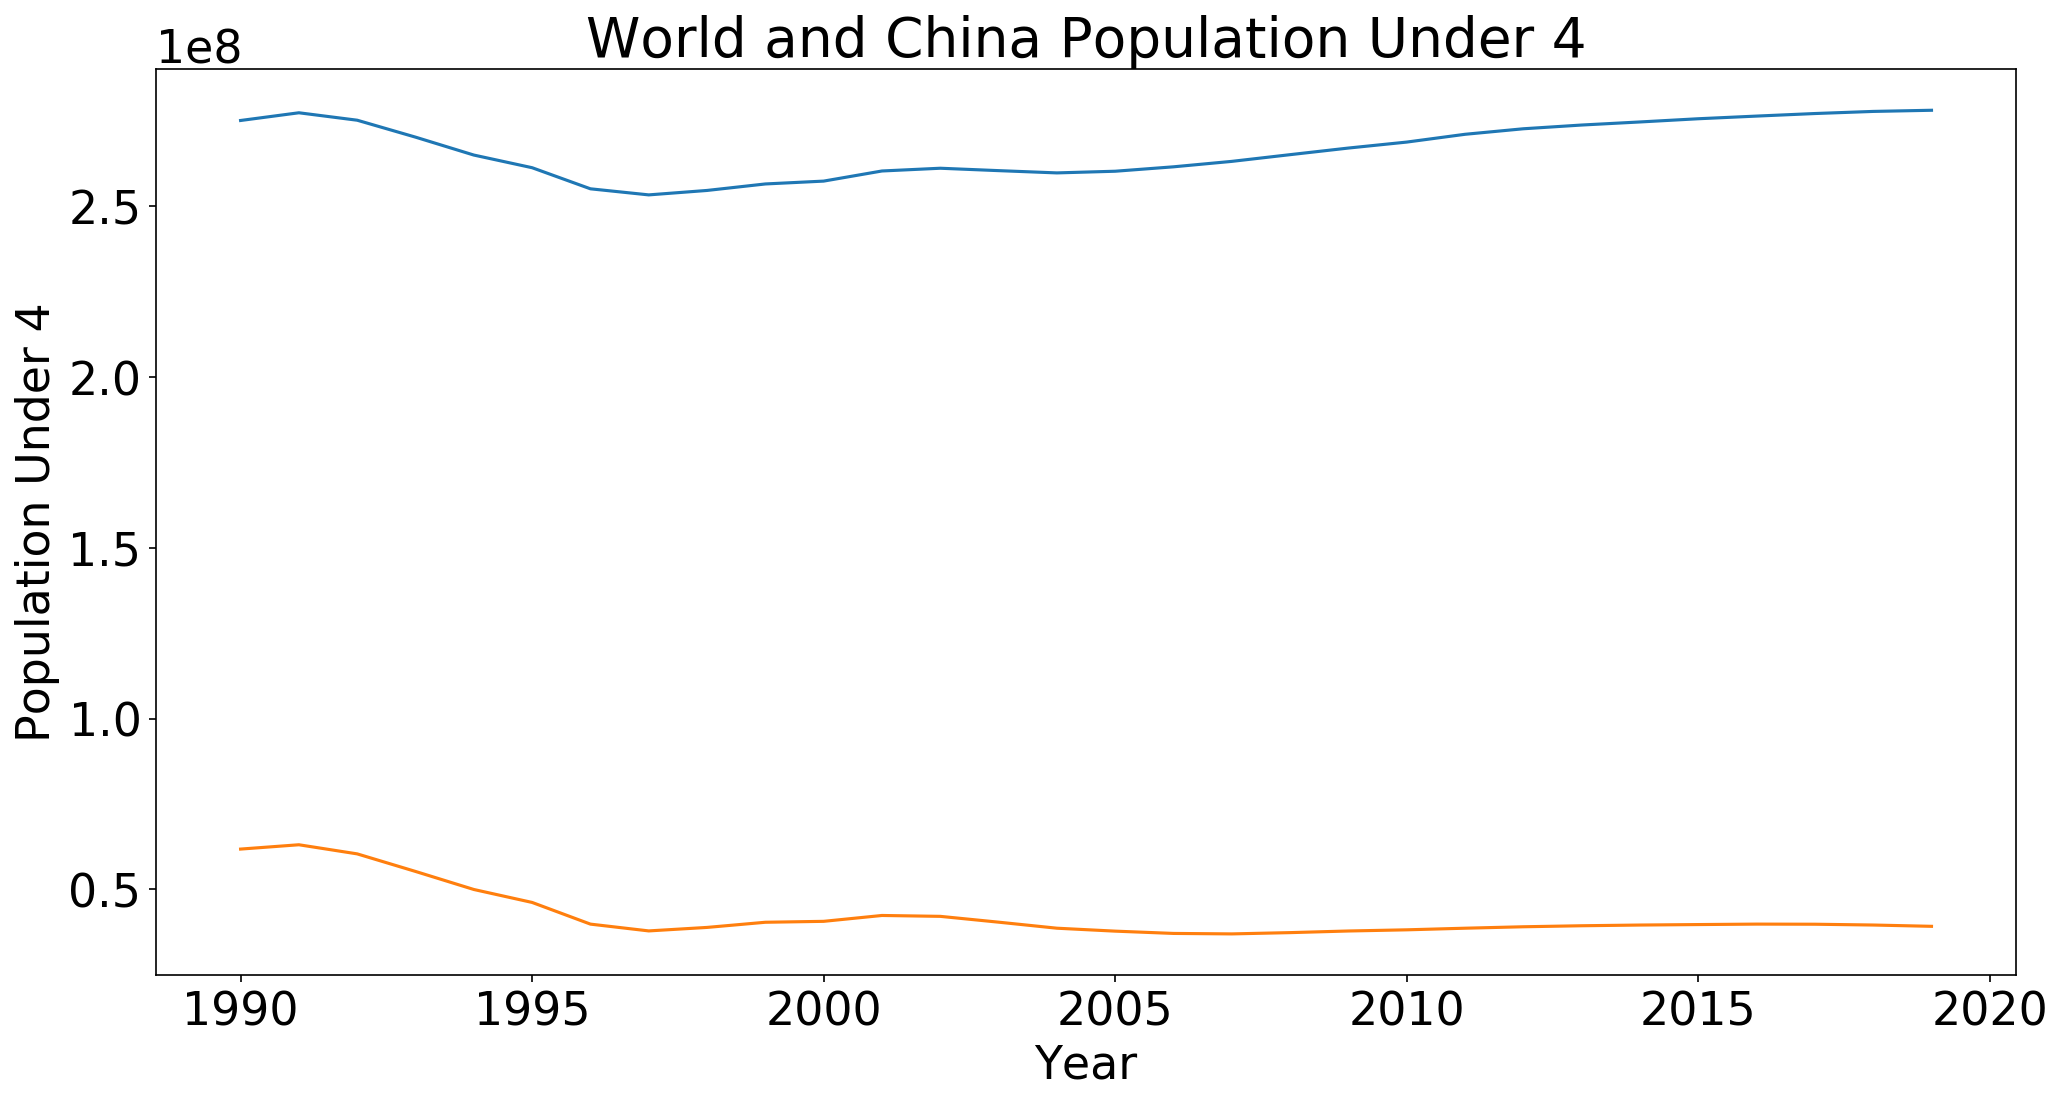

In [20]:
# set plot size
plt.figure(figsize=(16, 8), dpi=150)
  
total_df['SPPOP0004FE'].plot()
china_df['SPPOP0004FE'].plot()

# adding title to the plot
plt.title('World and China Population Under 4')
  
# adding Label to the x-axis
plt.xlabel('Year')
plt.ylabel('Population Under 4')

Text(0, 0.5, 'Birth Rate Per 1000 Women age 15-44')

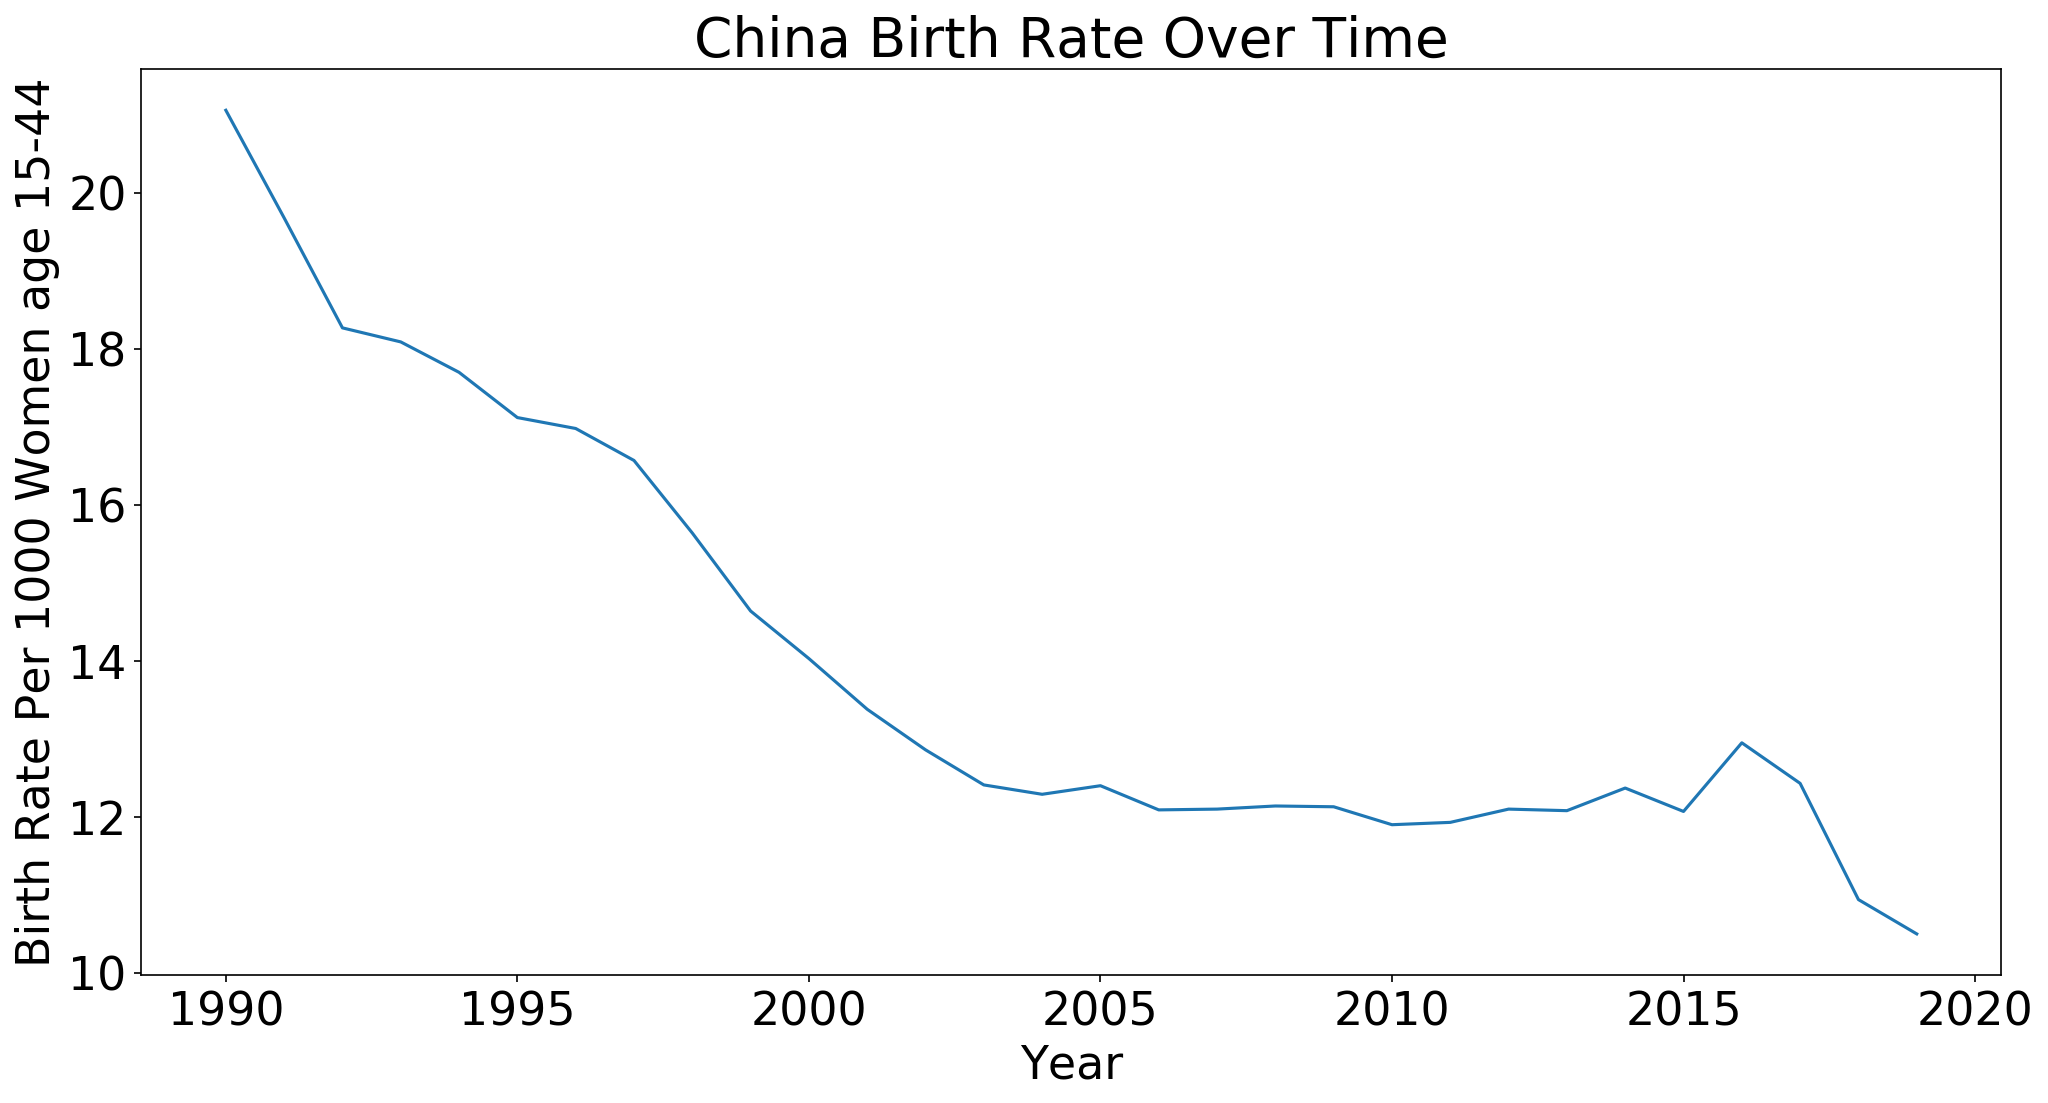

In [22]:
# China birthrate over time
china_df = df[df["ISO3"] == "CHN"]
china_df = china_df.groupby('Year').sum()


plt.figure(figsize=(16, 8), dpi=150)
  
china_df['SPDYNCBRTIN'].plot()

plt.title('China Birth Rate Over Time')

plt.xlabel('Year')
plt.ylabel('Birth Rate Per 1000 Women age 15-44')

Text(0, 0.5, 'Population Under 4')

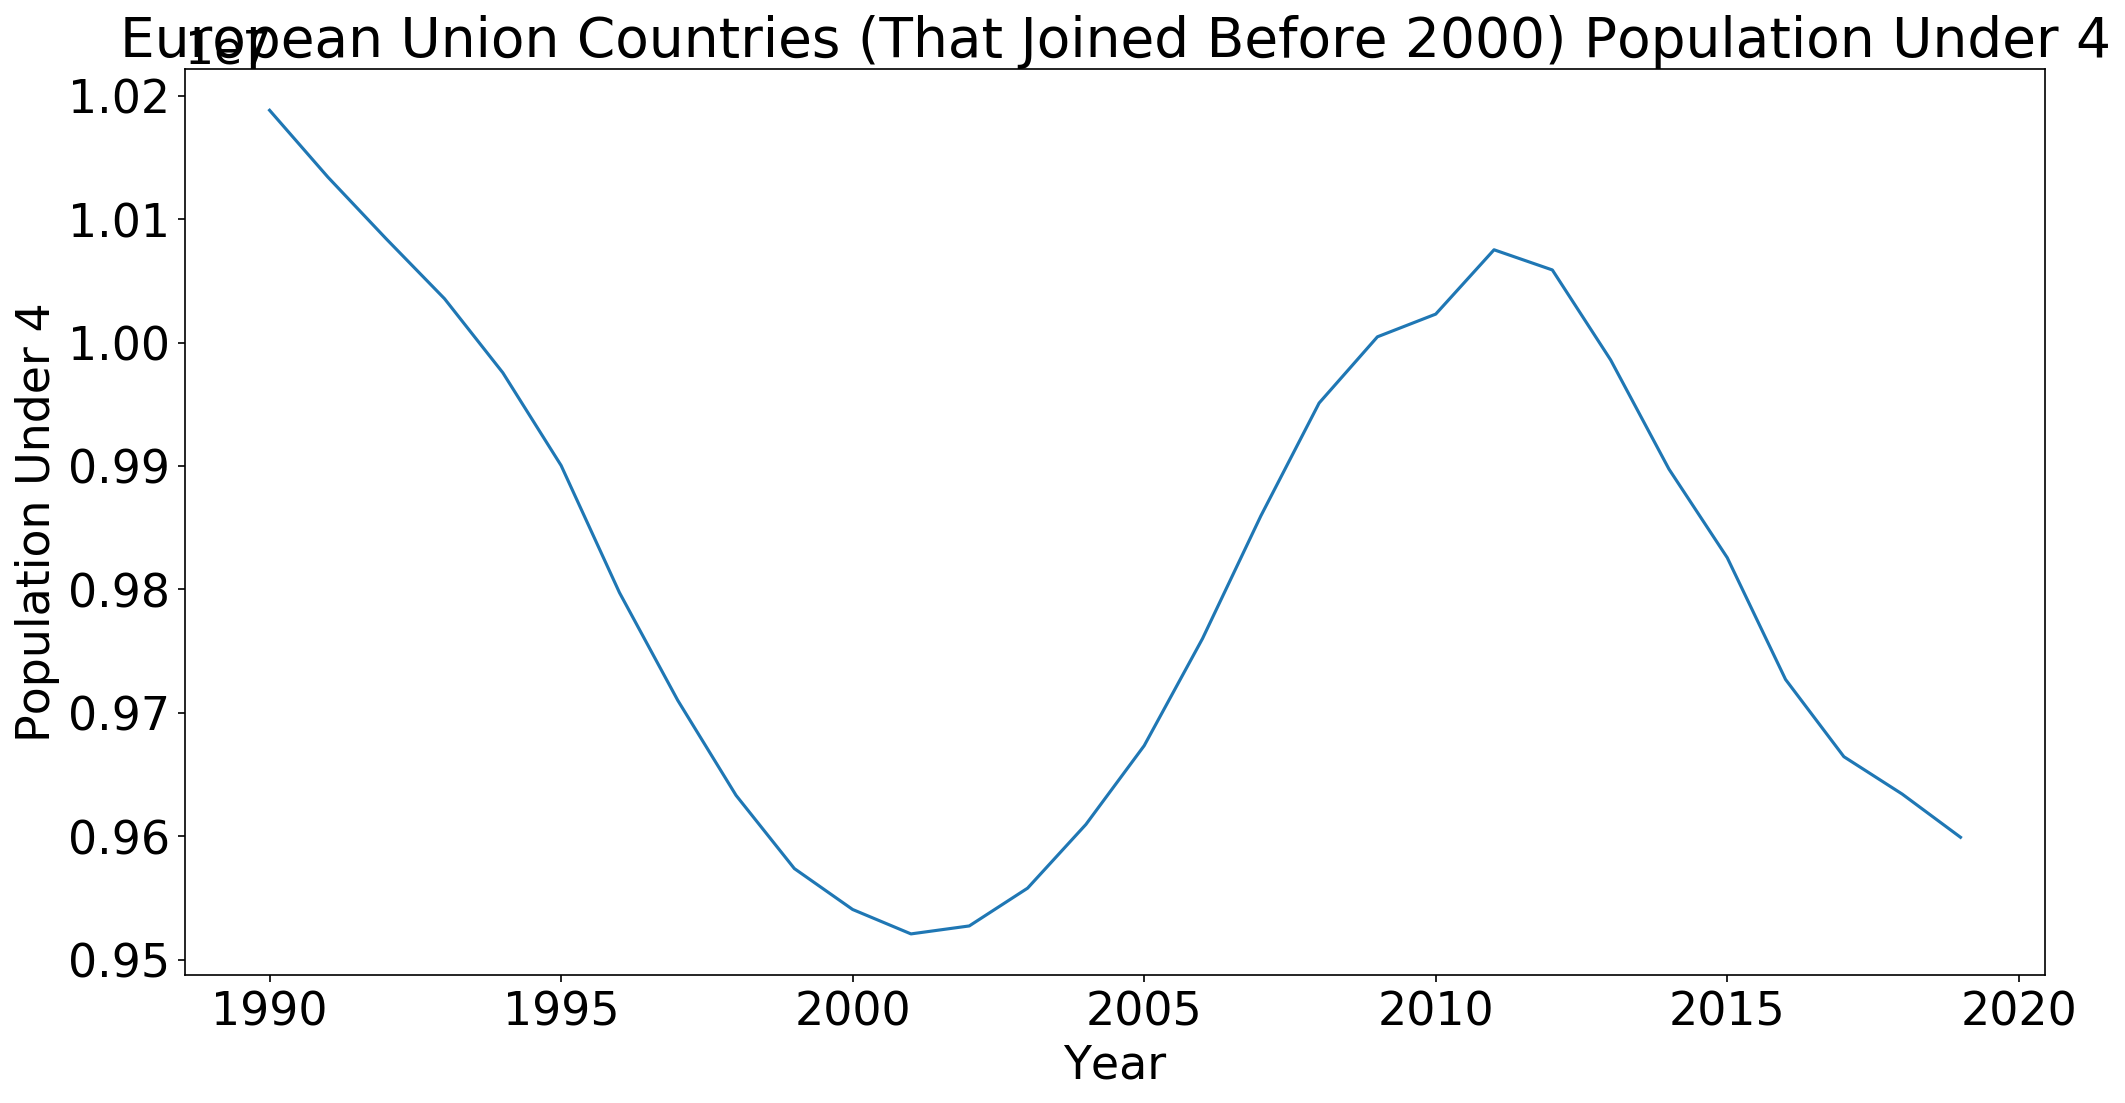

In [23]:
eu_df = df[df["ISO3"].isin(eu_countries)]
eu_df = eu_df.groupby('Year').sum()


plt.figure(figsize=(16, 8), dpi=150)
  
eu_df['SPPOP0004FE'].plot()

plt.title('European Union Countries (That Joined Before 2000) Population Under 4')

plt.xlabel('Year')
plt.ylabel('Population Under 4')

Text(0, 0.5, 'Population Under 4')

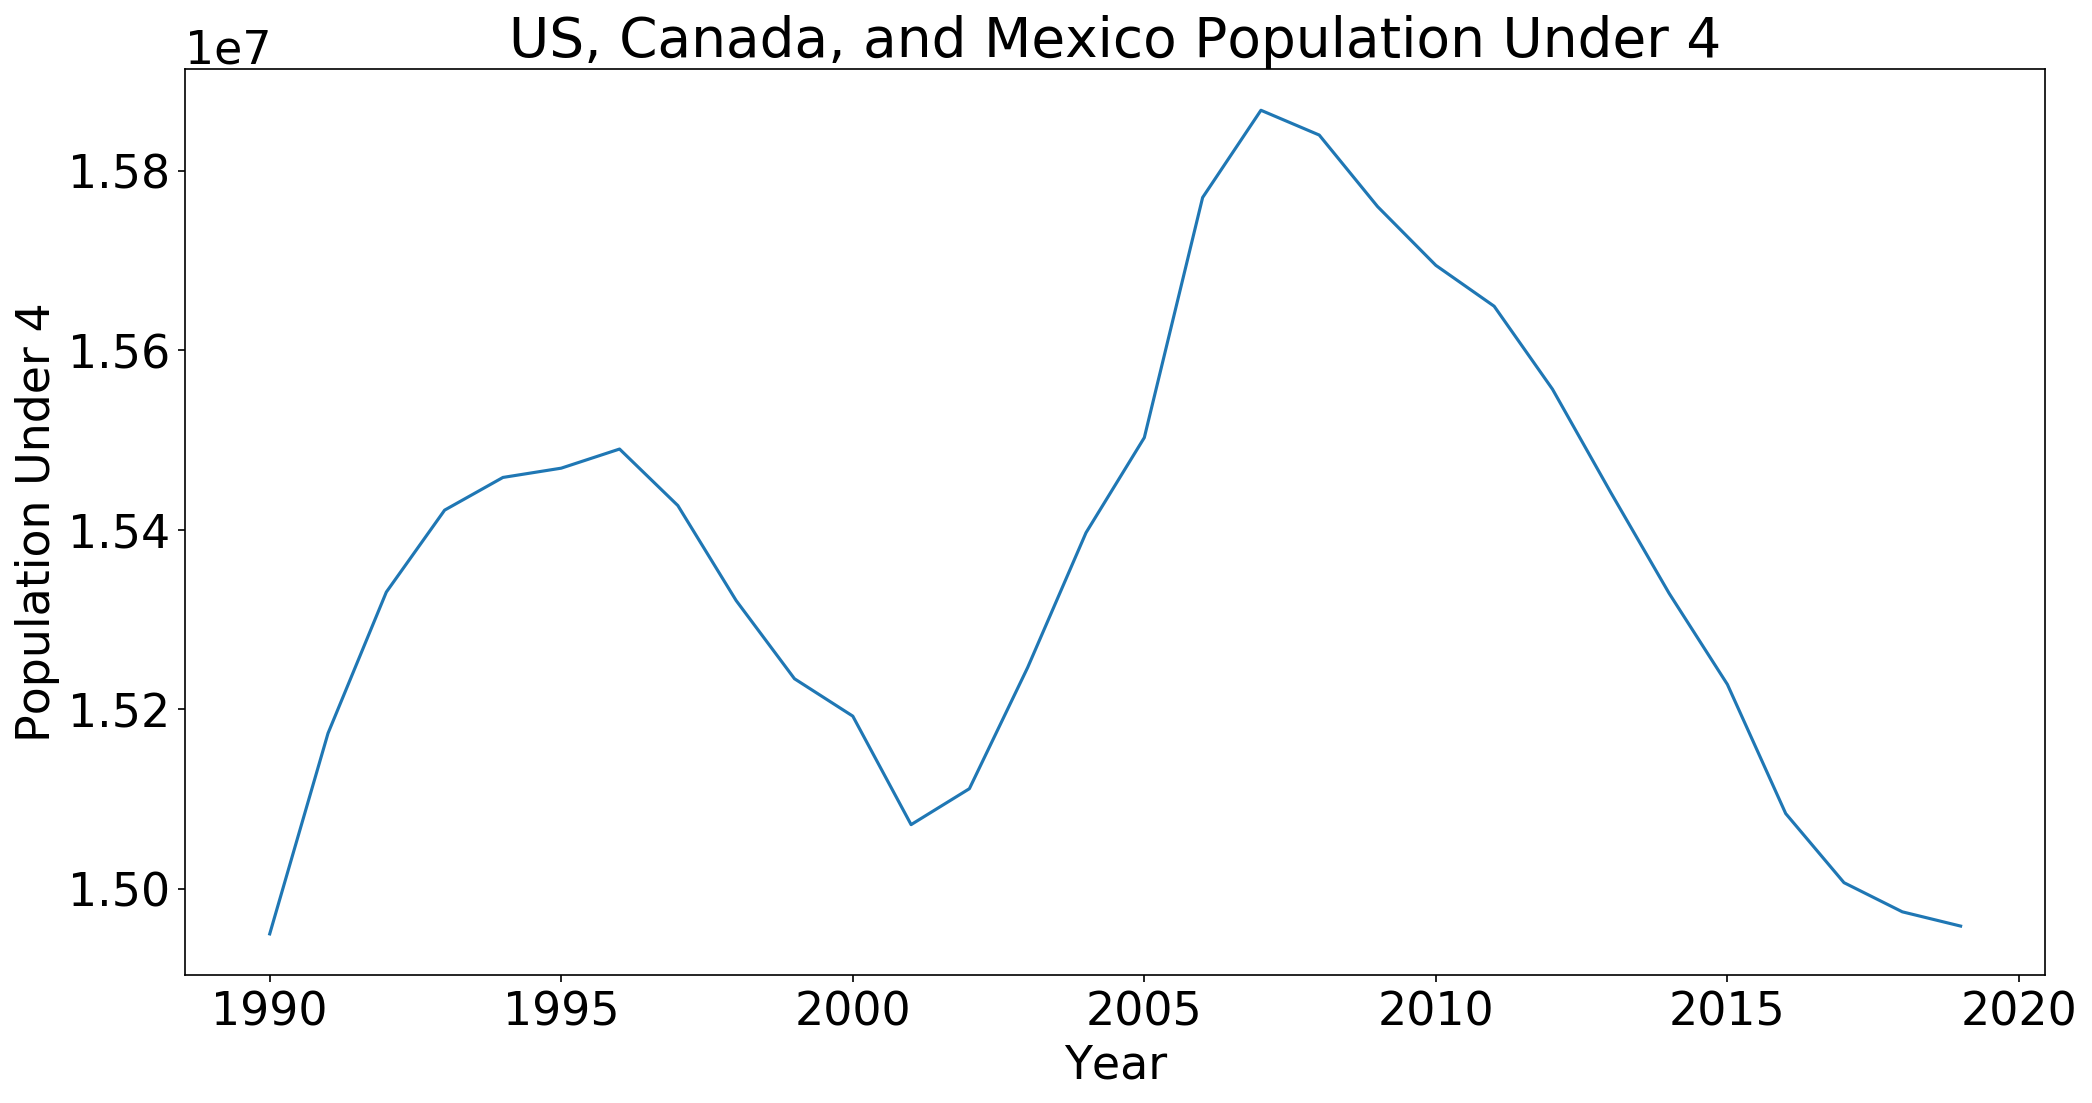

In [24]:
nafta_df = df[df["ISO3"].isin(nafta_countries)]
nafta_df = nafta_df.groupby('Year').sum()


plt.figure(figsize=(16, 8), dpi=150)
  
nafta_df['SPPOP0004FE'].plot()

plt.title('US, Canada, and Mexico Population Under 4')

plt.xlabel('Year')
plt.ylabel('Population Under 4')

Text(0, 0.5, 'Population Under 4')

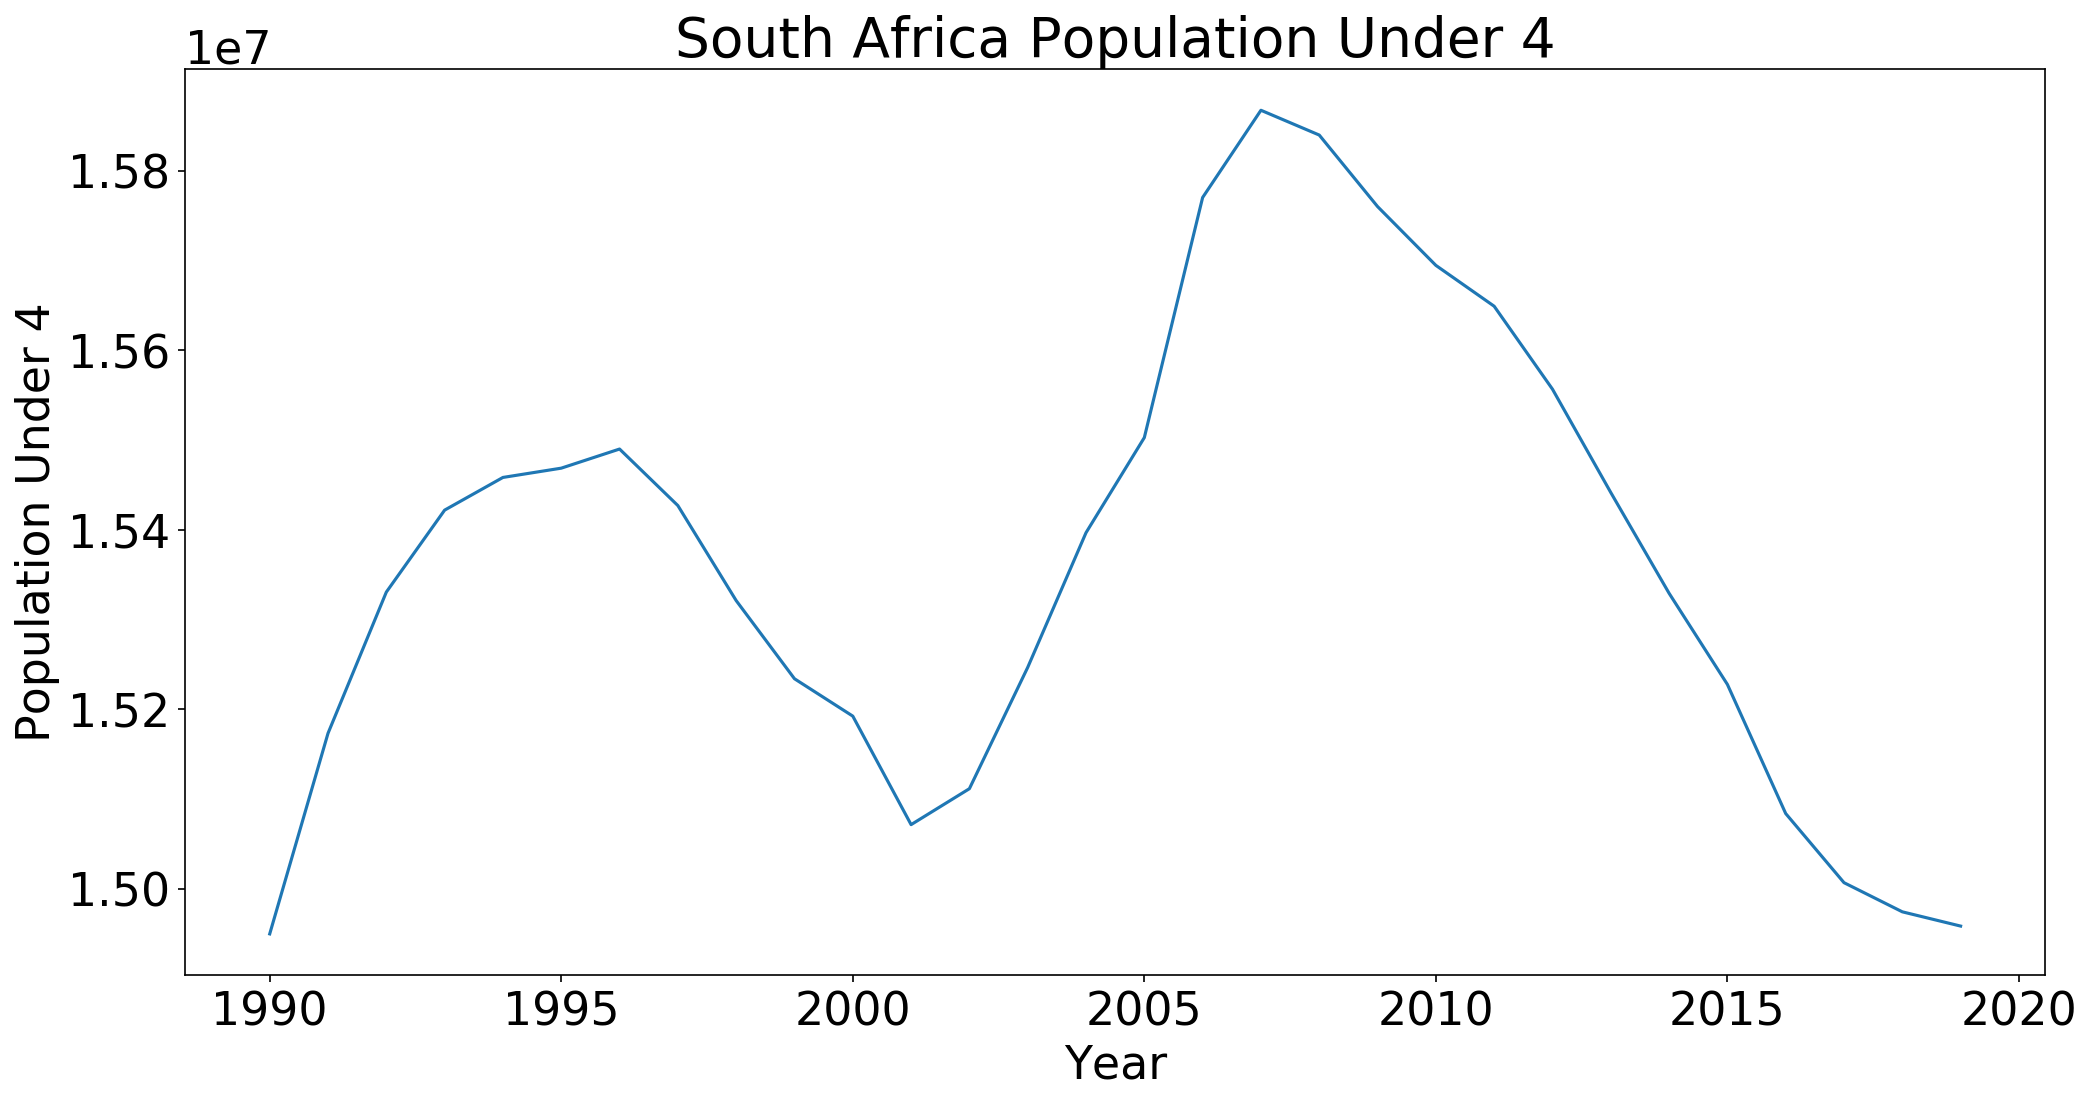

In [25]:
sa_df = df[df["ISO3"] == 'ZAF']

plt.figure(figsize=(16, 8), dpi=150)
  
nafta_df['SPPOP0004FE'].plot()

plt.title('South Africa Population Under 4')

plt.xlabel('Year')
plt.ylabel('Population Under 4')

Text(0, 0.5, 'Population Under 4')

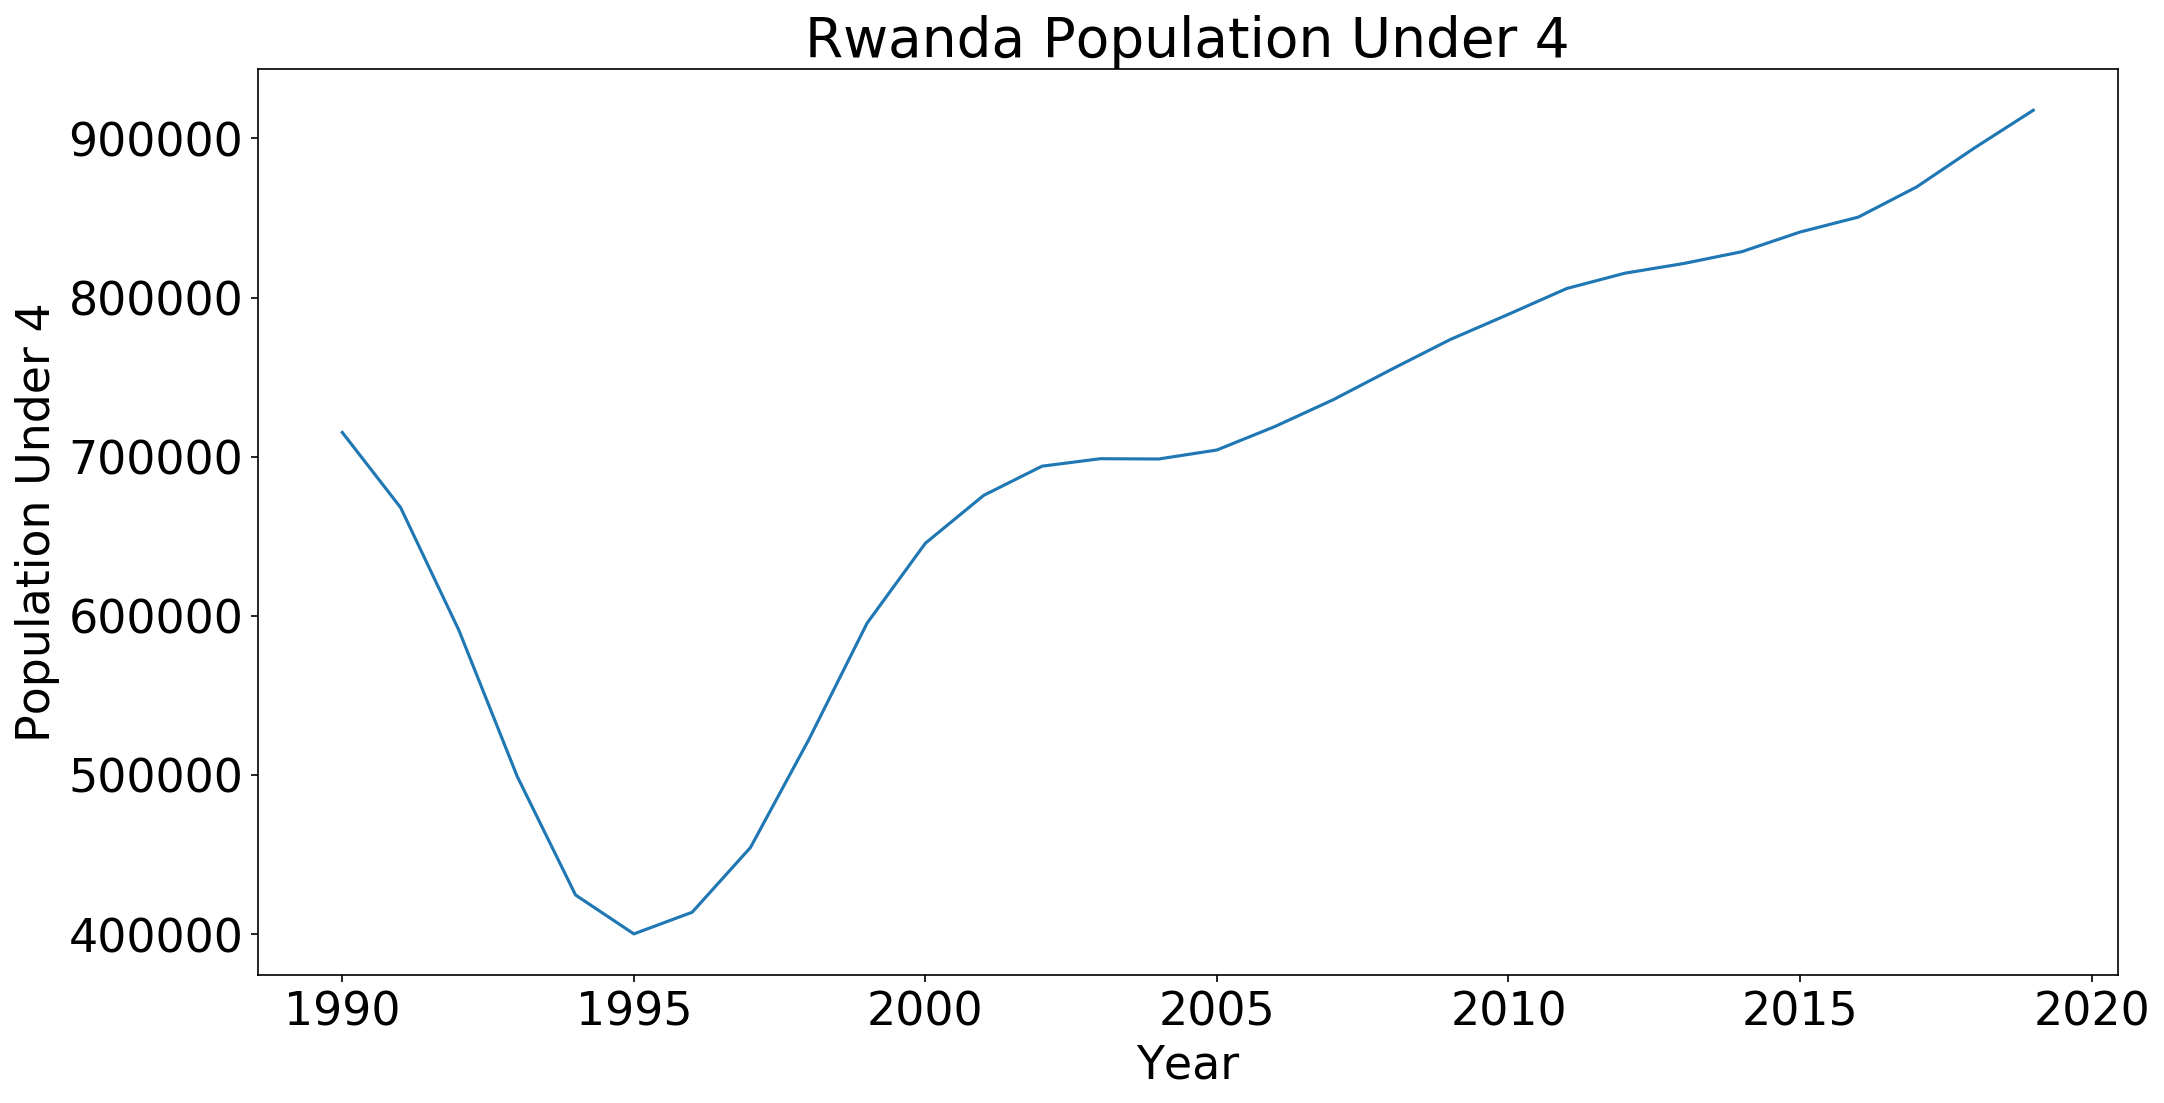

In [26]:
rwanda_df = df[df["ISO3"] == 'RWA']

plt.figure(figsize=(16, 8), dpi=150)
  
rwanda_df['SPPOP0004FE'].plot()

plt.title('Rwanda Population Under 4')

plt.xlabel('Year')
plt.ylabel('Population Under 4')

### Demonstrate that increasing wealth decreases birth rate

This was part of the executive week presentation. It isn't related to the rest of the notebook, other than the fact that it's a visualization that was in the presentation. Since it's only one cell, here is as good of a place as any to include it.

Text(0, 0.5, 'Birthrate (# of Births Per 1000 Women Age 15-44)')

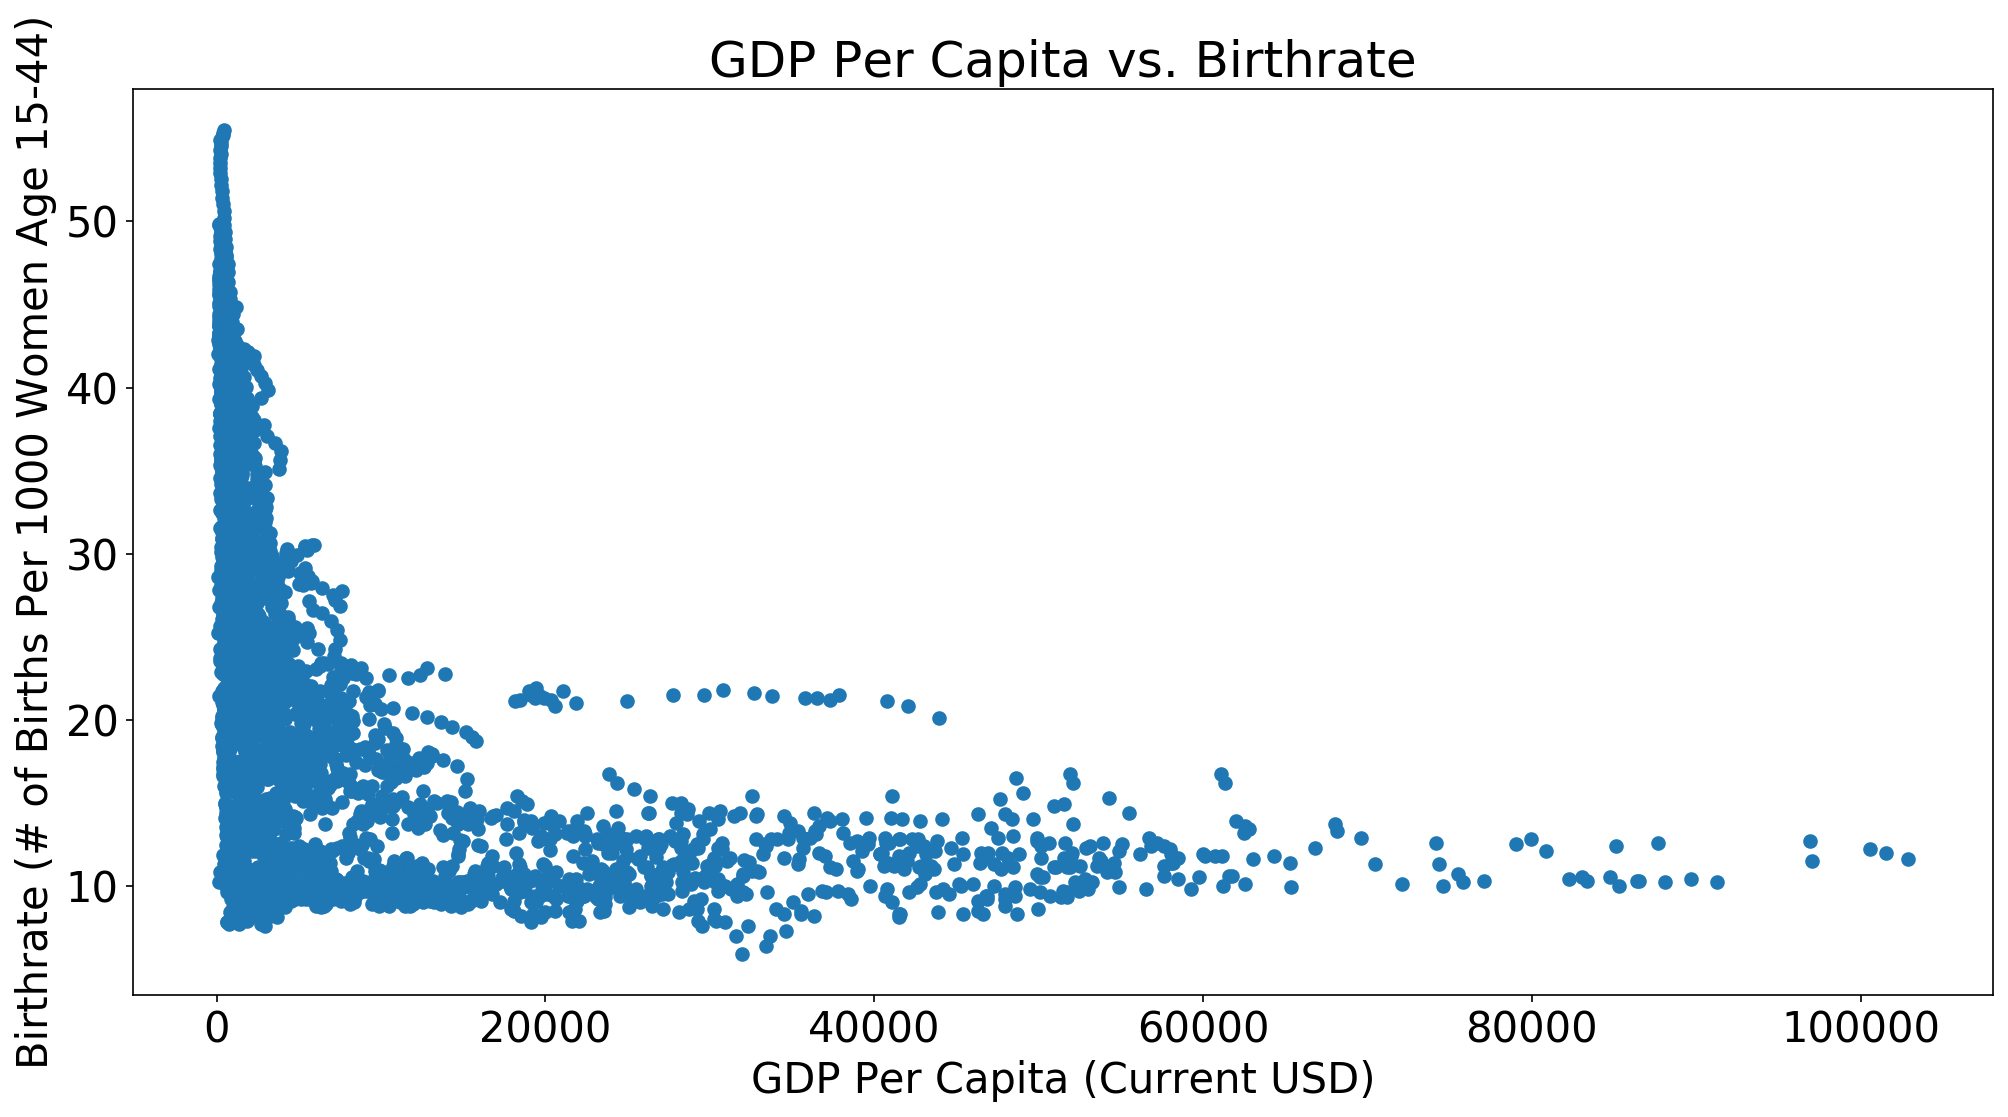

In [27]:
# SPDYNCBRTIN is birthrate
# NYGDPPCAPKD is GDP per capita (Constant 2010 USD)
# NYGDPPCAPCD is GDP per capita (Current USD)
# NYGDPMKTPCD is GDP

plt.figure(figsize=(16, 8), dpi=150)
plt.rcParams['font.size'] = 20
plt.scatter(df['NYGDPPCAPCD'], df['SPDYNCBRTIN'])

plt.title('GDP Per Capita vs. Birthrate')

plt.xlabel('GDP Per Capita (Current USD)')
plt.ylabel('Birthrate (# of Births Per 1000 Women Age 15-44)')